In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [48]:
Ts = [8, 16, 32, 64]
N = 1000
true_labels = [0] * N
true_labels.extend([2] * N)
true_labels.extend([1] * N)
true_labels = np.array(true_labels)
x_axis_labels = ["immobile", "hybrid", "mobile"]
y_axis_labels = ["immobile", "hybrid", "mobile"]

In [49]:
conf_mats = []
for T in Ts:
    res = pd.read_csv(f"./validation/result/{T}/trajectories.trxyt.csv")
    pred_labels = np.array(res['predicted_class_id'])
    conf_mats.append(metrics.confusion_matrix(true_labels, pred_labels))

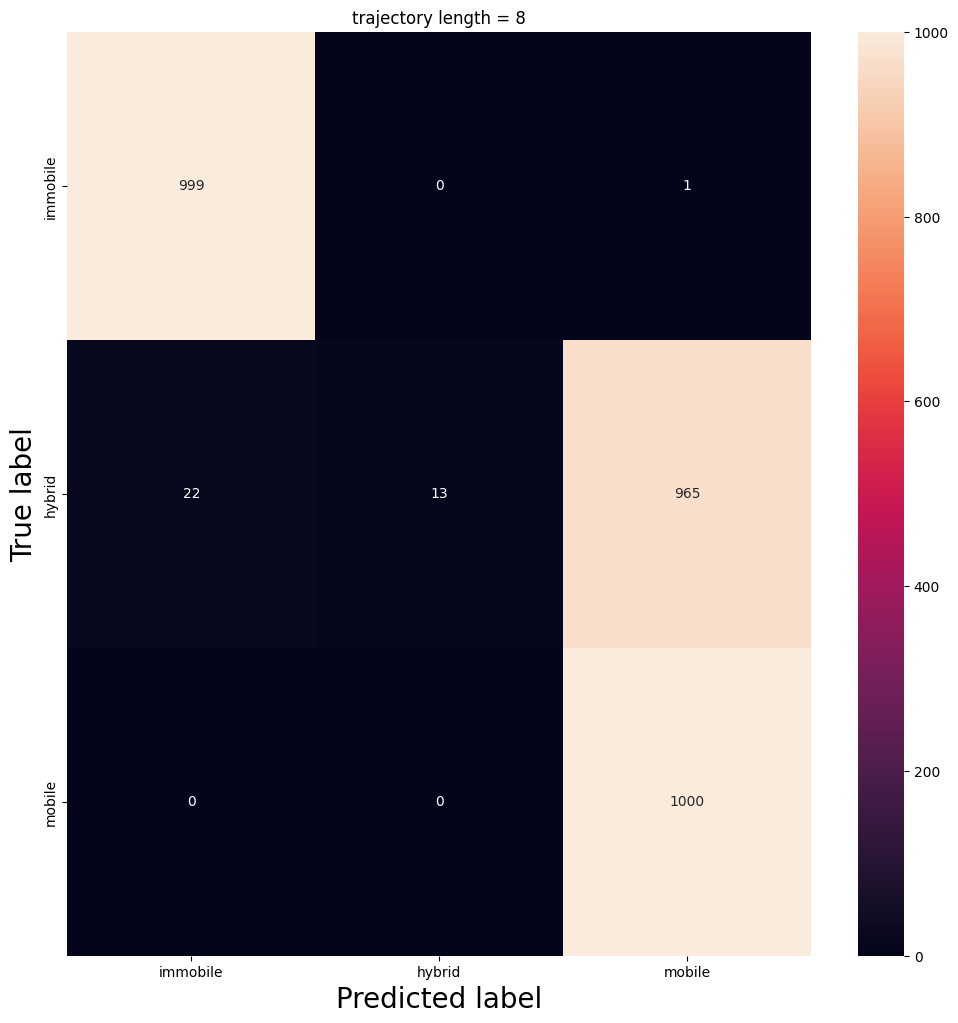

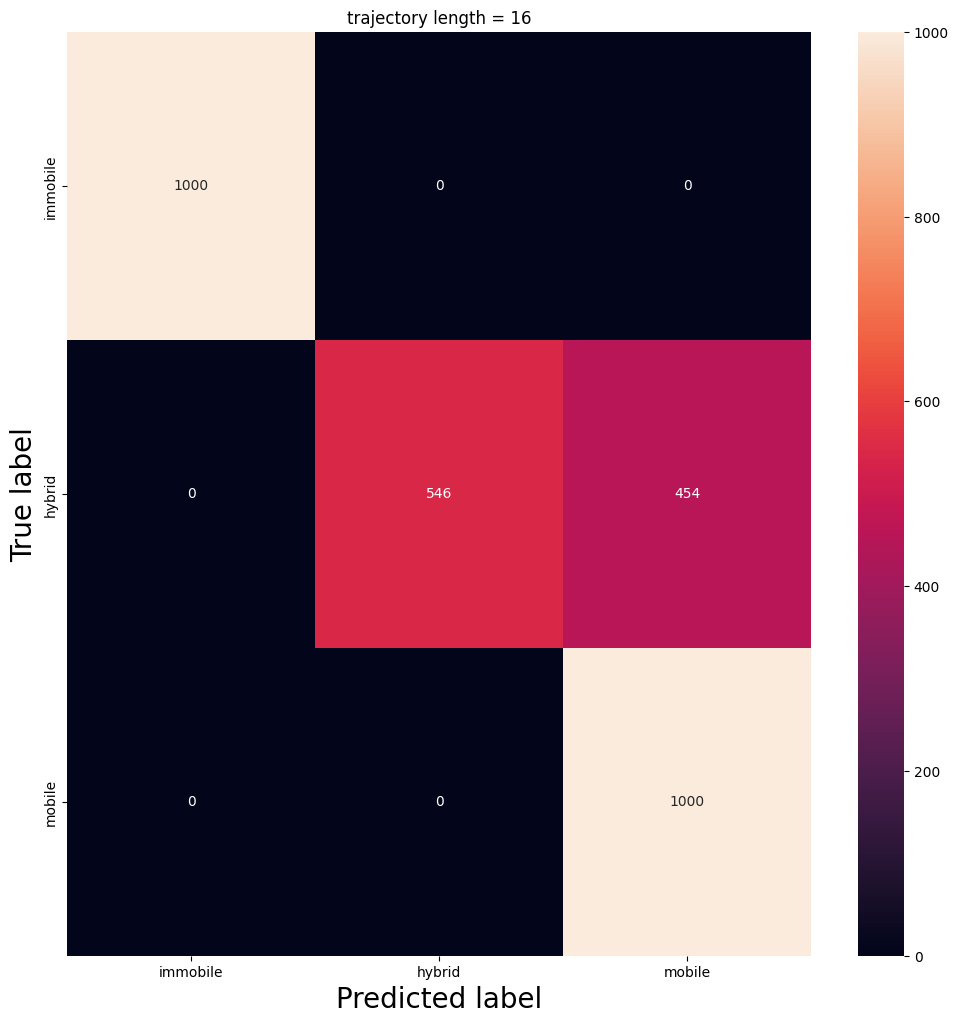

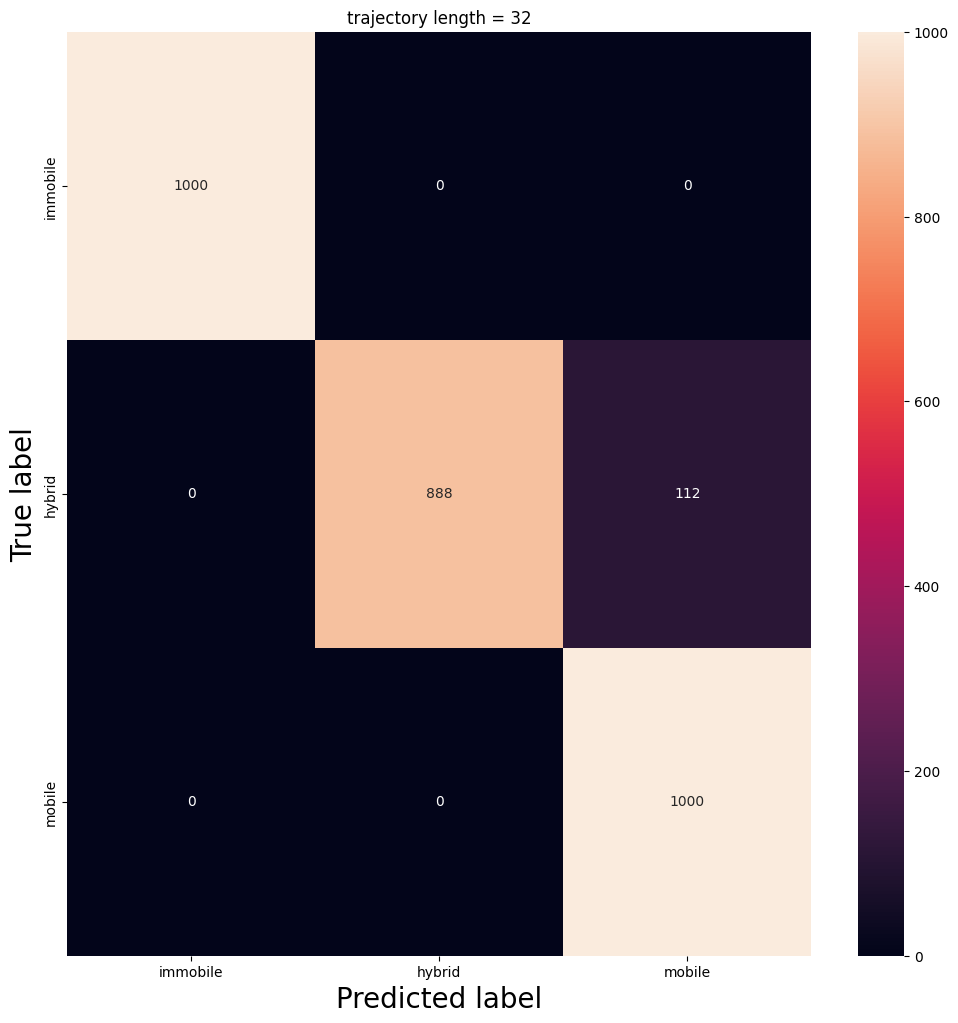

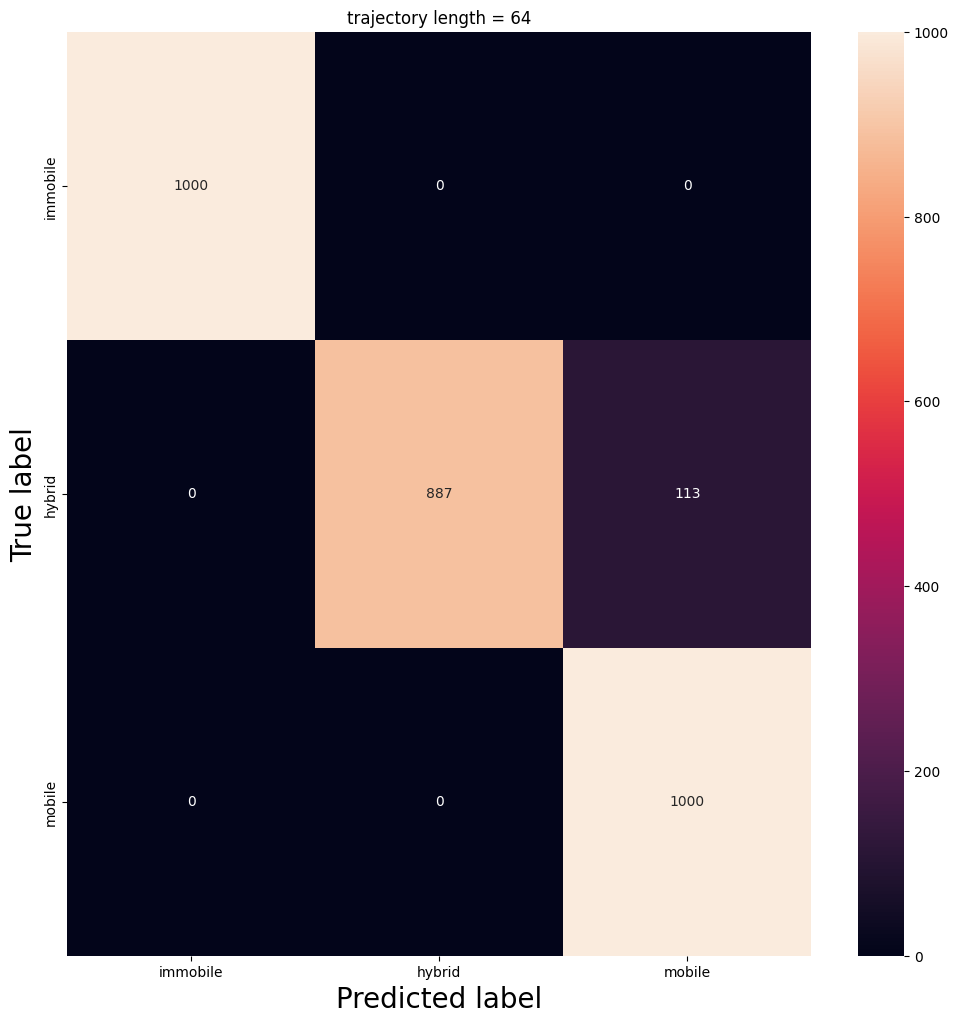

In [54]:
for T, idx in zip(Ts, range(len(conf_mats))):
    plt.figure(figsize=(12,12))
    sns.heatmap(conf_mats[idx], annot=True, fmt = 'g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    plt.title(f'trajectory length = {T}')
    plt.ylabel("True label", fontsize=20)
    plt.xlabel("Predicted label", fontsize=20)
    plt.savefig(f'legnth_{T}.png')
plt.show()